In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [2]:
Data=pd.read_csv('Diabetes.csv')
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
Data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### DATA PREPROCESSING

In [5]:
Data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
[i for i in Data.columns if Data[i].isna().sum()]

[]

In [7]:
Data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
Data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### EDA

Pregnancies:


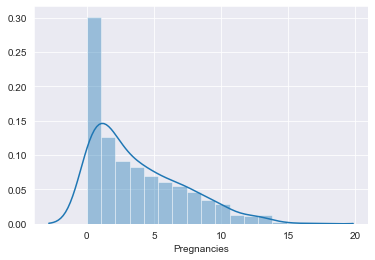

Glucose:


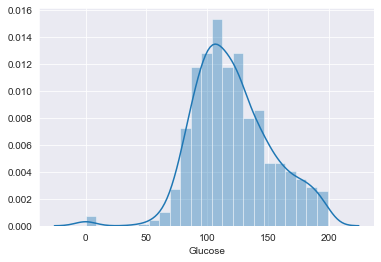

BloodPressure:


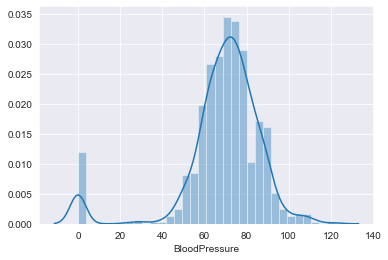

SkinThickness:


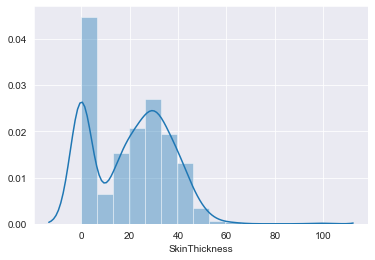

Insulin:


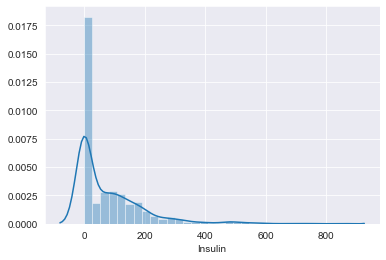

BMI:


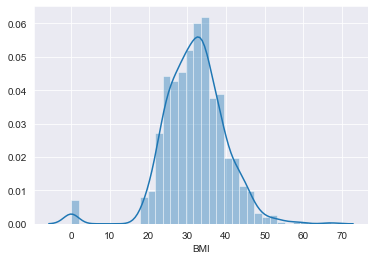

DiabetesPedigreeFunction:


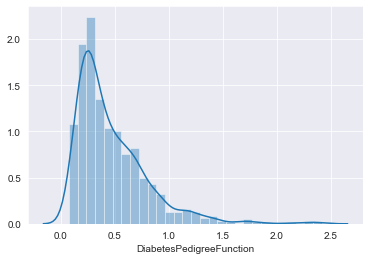

Age:


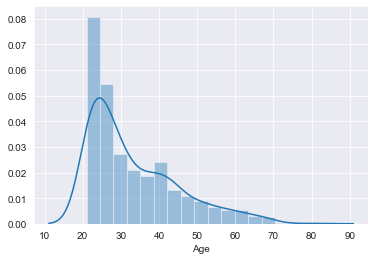

Outcome:


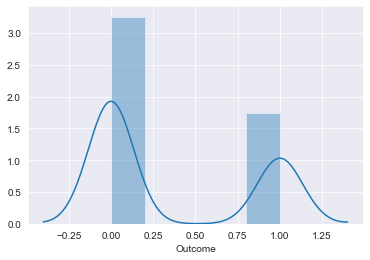

In [9]:
# DISTRIBUTION PLOT OF ALL COLUMNS
for i in Data.columns:
    print(i + ":")
    sns.distplot(Data[i])
    plt.show()

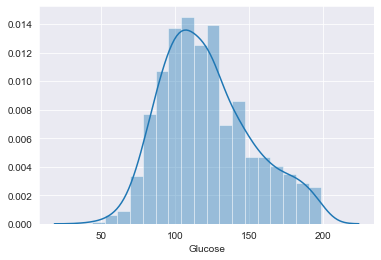

In [10]:
# GLUCOSE:
Data['Glucose'].replace(0,Data['Glucose'].mean(),inplace=True)
sns.distplot(Data['Glucose'])

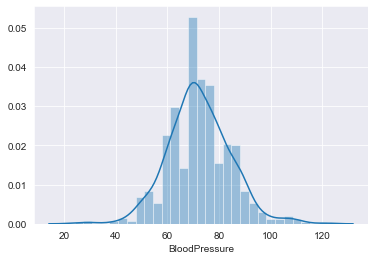

In [11]:
# BLOOD PRESSURE:
Data['BloodPressure'].replace(0,Data['BloodPressure'].mean(),inplace=True)
sns.distplot(Data['BloodPressure'])

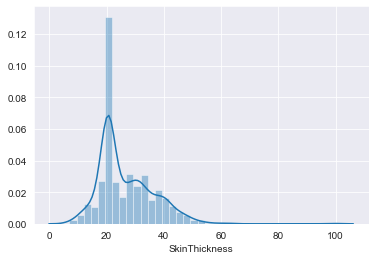

In [12]:
# SKIN THICKMESS:
Data['SkinThickness'].replace(0,Data['SkinThickness'].mean(),inplace=True)
sns.distplot(Data['SkinThickness'])

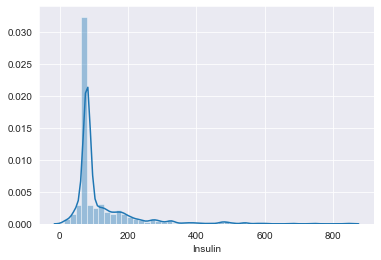

In [13]:
# INSULIN:
Data['Insulin'].replace(0,Data['Insulin'].mean(),inplace=True)
sns.distplot(Data['Insulin'])

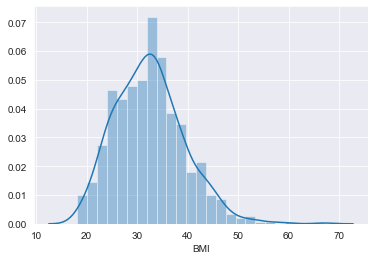

In [14]:
# BMI:
Data['BMI'].replace(0,Data['BMI'].mean(),inplace=True)
sns.distplot(Data['BMI'])

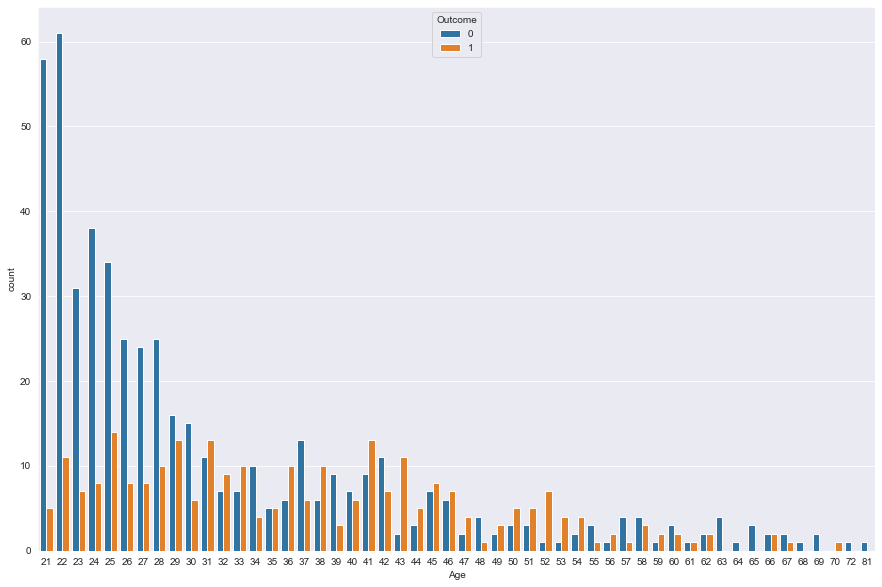

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(Data['Age'],hue=Data['Outcome'])

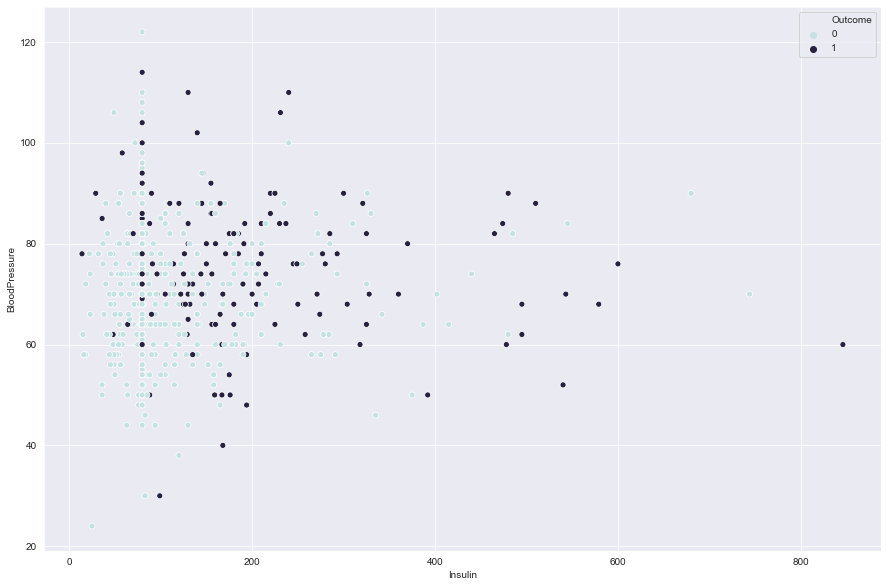

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=Data['Insulin'],y=Data['BloodPressure'],hue=Data['Outcome'],palette='ch:start=.2,rot=-.3')

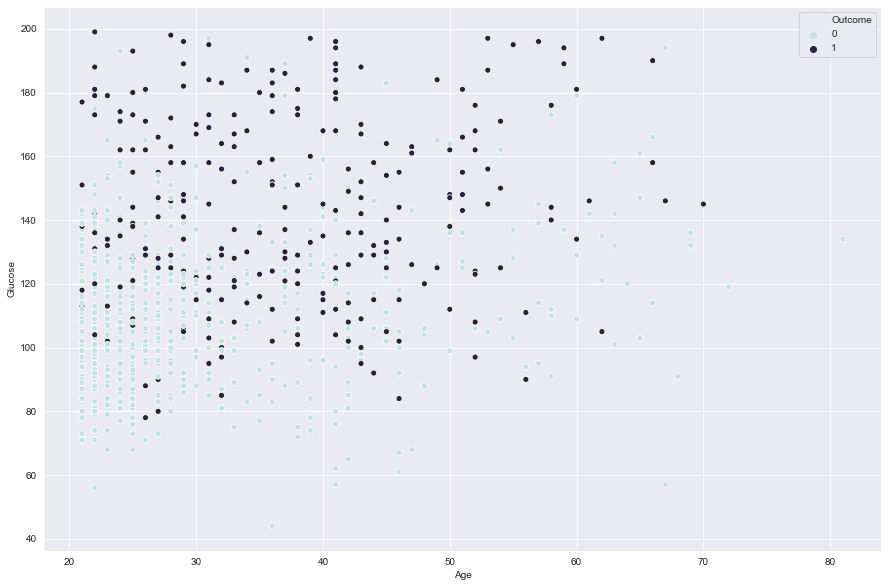

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(Data['Age'],Data['Glucose'],hue=Data['Outcome'],palette='ch:start=.2,rot=-.3')

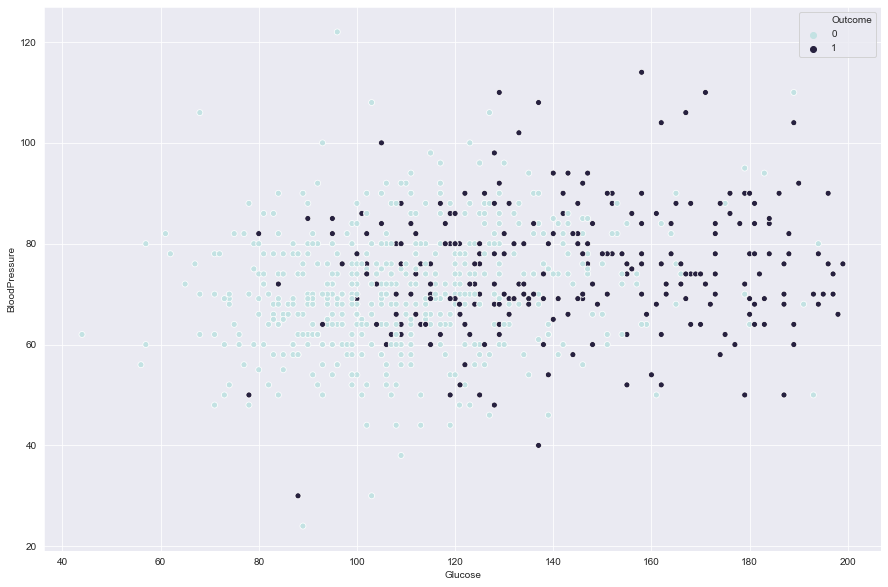

In [18]:
plt.figure(figsize=(15,10))
sns.scatterplot(Data['Glucose'],Data['BloodPressure'],hue=Data['Outcome'],palette='ch:start=.2,rot=-.3')

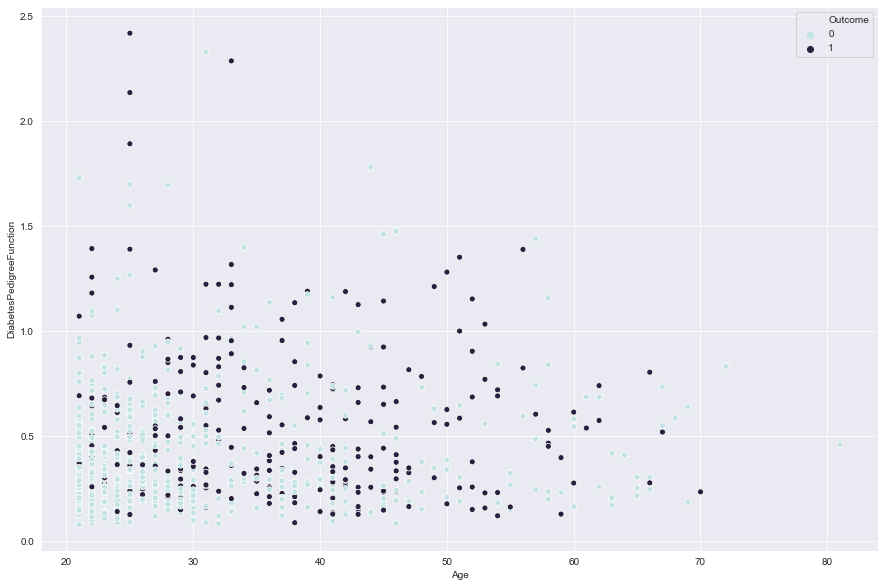

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(Data['Age'],Data['DiabetesPedigreeFunction'],hue=Data['Outcome'],palette='ch:start=.2,rot=-.3')

In [20]:
Data['Insulin'].groupby(Data['Outcome']).mean()

Outcome
0    106.457354
1    141.426597
Name: Insulin, dtype: float64

In [21]:
Data['Glucose'].groupby(Data['Outcome']).mean()

Outcome
0    110.705367
1    142.159661
Name: Glucose, dtype: float64

In [22]:
Data['Age'].groupby(Data['Outcome']).median()

Outcome
0    27
1    36
Name: Age, dtype: int64

In [23]:
Data['BloodPressure'].groupby(Data['Outcome']).mean()

Outcome
0    70.810008
1    74.950326
Name: BloodPressure, dtype: float64

In [24]:
Data['SkinThickness'].groupby(Data['Outcome']).max()

Outcome
0    60.0
1    99.0
Name: SkinThickness, dtype: float64

### FEATURE ENGINEERING

In [25]:
# FOR IQR:
for i in Data.columns:
    IQR=Data[i].quantile(0.75)-Data[i].quantile(0.25)
    Lower_Bridge=Data[i].quantile(0.25)-(IQR*1.5)
    Upper_Bridge=Data[i].quantile(0.75)+(IQR*1.5)
    
    if Data[Data[i]>Upper_Bridge].any(axis=None):
        print(i," : Yes")
    else:
        print(i," : No")

Pregnancies  : Yes
Glucose  : No
BloodPressure  : Yes
SkinThickness  : Yes
Insulin  : Yes
BMI  : Yes
DiabetesPedigreeFunction  : Yes
Age  : Yes
Outcome  : No


In [26]:
# FOR STD DEVIATION:
for i in Data.columns:
    Upper_Boundary=Data[i].mean() + 3*Data[i].std()
    Lower_Boundary=Data[i].mean() - 3*Data[i].std()
    
    if Data.loc[Data[i] > Upper_Boundary,i].any(axis=None) and Data.loc[Data[i] < Lower_Boundary,i].any(axis=None):
        print(i," : Yes")
    else:
        print(i," : No")

Pregnancies  : No
Glucose  : No
BloodPressure  : Yes
SkinThickness  : No
Insulin  : No
BMI  : No
DiabetesPedigreeFunction  : No
Age  : No
Outcome  : No


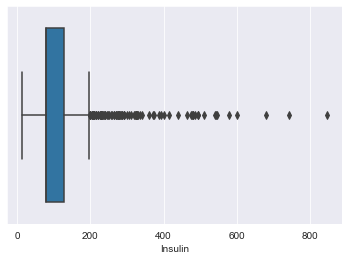

In [27]:
# INSULIN :
sns.boxplot(Data['Insulin'])

In [28]:
# AS IT FOLLOWS SKEWED DISTRIBUTION SO,IQR
IQR=Data['Insulin'].quantile(0.75)-Data['Insulin'].quantile(0.25)
Lower_Bridge=Data['Insulin'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['Insulin'].quantile(0.75)+(IQR*1.5)

In [29]:
Lower_Bridge,IQR,Upper_Bridge

(8.623697916666671, 47.45052083333333, 198.42578125)

In [30]:
Data.loc[Data['Insulin'] > Upper_Bridge,'Insulin'] = Upper_Bridge

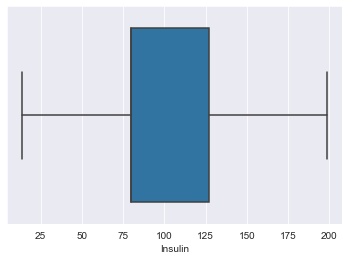

In [31]:
sns.boxplot(Data['Insulin'])

In [32]:
# BLOOD PRESSURE: IT FOLLOWS GAUSSIAN DISTRIBUTION SO, STANDARD DEVIATION
Upper_Boundary=Data['BloodPressure'].mean() + 3*Data['BloodPressure'].std()
Lower_Boundary=Data['BloodPressure'].mean() - 3*Data['BloodPressure'].std()

In [33]:
Lower_Boundary,Data['BloodPressure'].mean(),Upper_Boundary

(35.90701172379312, 72.25480651855469, 108.60260131331626)

In [34]:
Data.loc[Data['BloodPressure'] > Upper_Boundary,'BloodPressure'] = Upper_Boundary
Data.loc[Data['BloodPressure'] < Lower_Boundary,'BloodPressure'] = Lower_Boundary

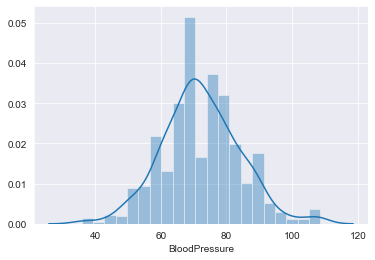

In [35]:
sns.distplot(Data['BloodPressure'])

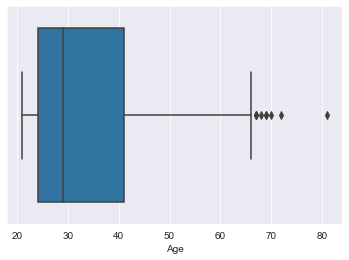

In [36]:
# AGE :
sns.boxplot(Data['Age'])

In [37]:
# AS IT FOLLOWS SKEWED DISTRIBUTION SO,IQR
IQR=Data['Age'].quantile(0.75)-Data['Age'].quantile(0.25)
Lower_Bridge=Data['Age'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['Age'].quantile(0.75)+(IQR*1.5)

In [38]:
Lower_Bridge,IQR,Upper_Bridge

(-1.5, 17.0, 66.5)

In [39]:
Data.loc[Data['Age'] > Upper_Bridge,'Age'] = Upper_Bridge

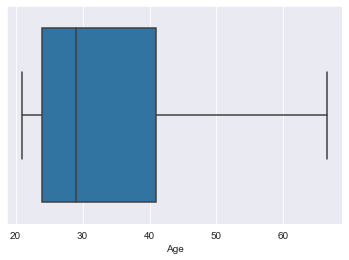

In [40]:
sns.boxplot(Data['Age'])

In [41]:
# BMI : IT FOLLOWS GAUSSIAN DISTRIBUTION SO, STANDARD DEVIATION
Upper_Boundary=Data['BMI'].mean() + 3*Data['BMI'].std()
Lower_Boundary=Data['BMI'].mean() - 3*Data['BMI'].std()

In [42]:
Lower_Boundary,Data['BMI'].mean(),Upper_Boundary

(11.824684633181015, 32.45080515543617, 53.07692567769133)

In [43]:
Data.loc[Data['BMI'] > Upper_Boundary,'BMI'] = Upper_Boundary
Data.loc[Data['BMI'] < Lower_Boundary,'BMI'] = Lower_Boundary

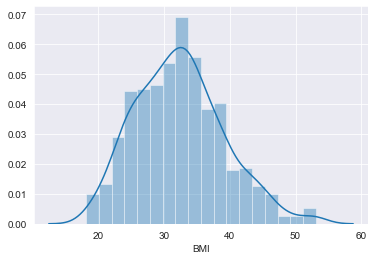

In [44]:
sns.distplot(Data['BMI'])

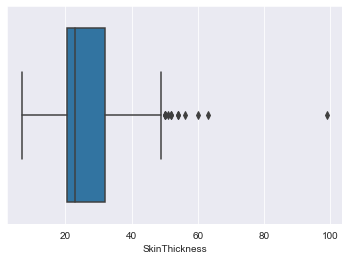

In [45]:
# SKIN THICKNESS : 
sns.boxplot(Data['SkinThickness'])

In [46]:
# IQR , AS IT IS SKEWED DISTRIBUTION
IQR=Data['SkinThickness'].quantile(0.75)-Data['SkinThickness'].quantile(0.25)
Lower_Bridge=Data['SkinThickness'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['SkinThickness'].quantile(0.75)+(IQR*1.5)

In [47]:
Lower_Bridge,IQR,Upper_Bridge

(3.341145833333332, 11.463541666666668, 49.1953125)

In [48]:
Data.loc[Data['SkinThickness'] > Upper_Bridge,'SkinThickness'] = Upper_Bridge

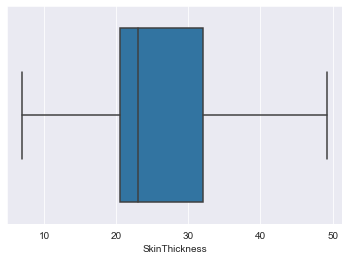

In [49]:
sns.boxplot(Data['SkinThickness'])

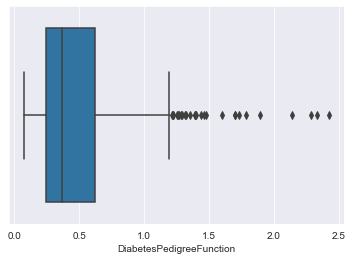

In [50]:
# DIABETES PEDIGREE FUNCTION :
sns.boxplot(Data['DiabetesPedigreeFunction'])

In [51]:
# IQR , AS IT IS SKEWED DISTRIBUTION
IQR=Data['DiabetesPedigreeFunction'].quantile(0.75)-Data['DiabetesPedigreeFunction'].quantile(0.25)
Lower_Bridge=Data['DiabetesPedigreeFunction'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['DiabetesPedigreeFunction'].quantile(0.75)+(IQR*1.5)

In [52]:
Lower_Bridge,IQR,Upper_Bridge

(-0.32999999999999996, 0.38249999999999995, 1.2)

In [53]:
Data.loc[Data['DiabetesPedigreeFunction'] > Upper_Bridge,'DiabetesPedigreeFunction'] = Upper_Bridge

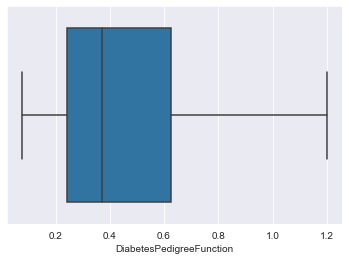

In [54]:
sns.boxplot(Data['DiabetesPedigreeFunction'])

In [55]:
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0,1


### FEATURE SELECTION

In [56]:
X=Data.drop('Outcome',axis=1)
y=Data['Outcome']

#### CORRELATION

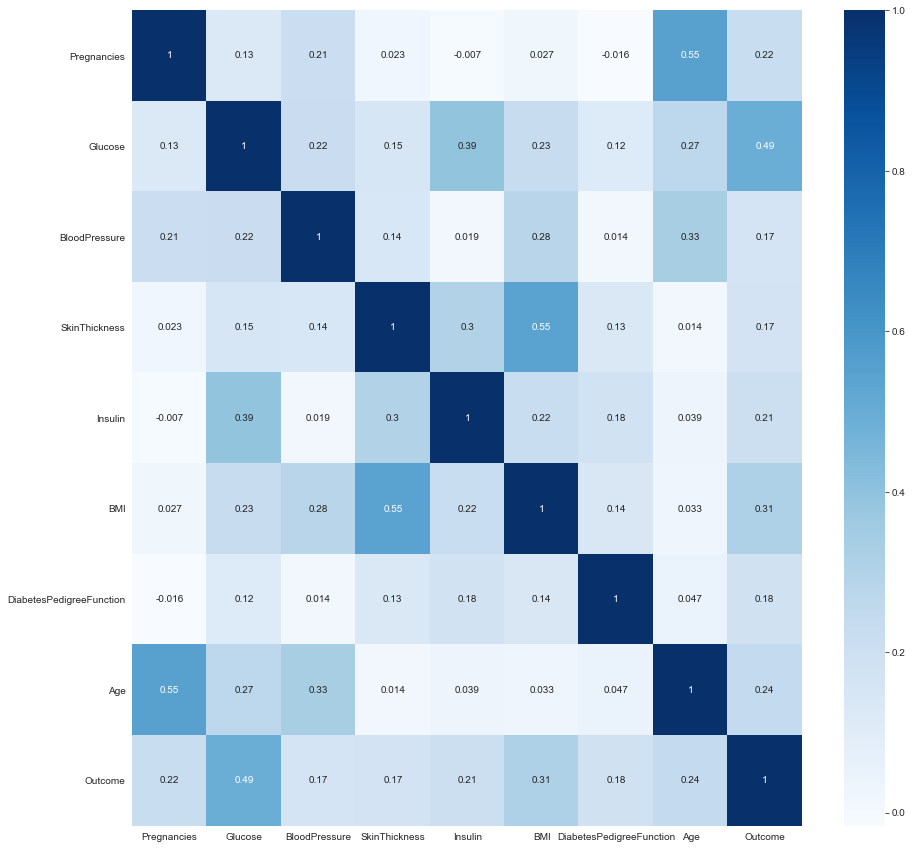

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(Data.corr(),annot=True,cmap='Blues')

In [58]:
# CHECKING OUT THE HIGH CORRELATED DATAS ON THE BASIS OF THRESOLD
def Correlation(Dataset,Thresold):
    Col_Corr=set()
    Corr_Matrix=Dataset.corr()
    for i in range(len(Corr_Matrix.columns)):
        for j in range(i):
            if abs(Corr_Matrix.iloc[i,j])>=Thresold:
                Colname=Corr_Matrix.columns[i]
                Col_Corr.add(Colname)
    return Col_Corr
Drop_Columns=Correlation(X,0.75)

In [59]:
# FEATURES HAVING HIGHLY CORREALATED VALUES 
Drop_Columns=list(Drop_Columns)
Drop_Columns

[]

#### SELECT K-BEST

In [60]:
Ordered_Rank_Features=SelectKBest(score_func=chi2,k='all')
Ordered_Features=Ordered_Rank_Features.fit(X,y)

In [61]:
Ordered_Features.scores_ 

array([ 111.51969064, 1418.66063574,   41.10338869,   72.71724058,
        703.96751083,  105.44534129,    4.66407436,  184.01168043])

In [62]:
Scores=pd.DataFrame(Ordered_Features.scores_,columns=['Score'])
Columns=pd.DataFrame(X.columns,columns=['Columns'])

Features_Rank=pd.concat([Columns,Scores],axis=1)
Features_Rank.sort_values(by=['Score'],ascending=False)

,Columns,Score
1,Glucose,1418.660636
4,Insulin,703.967511
7,Age,184.011680
0,Pregnancies,111.519691
5,BMI,105.445341
3,SkinThickness,72.717241
2,BloodPressure,41.103389
6,DiabetesPedigreeFunction,4.664074


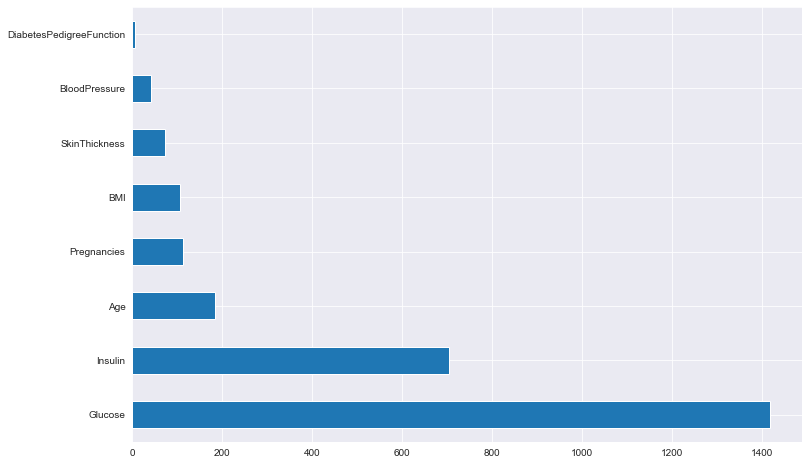

In [63]:
Features_Rank=pd.Series(Ordered_Features.scores_ ,index=X.columns)

plt.figure(figsize = (12,8))
Features_Rank.nlargest(20).plot(kind='barh')

#### EXTRATREES CLASSIFIER

In [64]:
ETC=ExtraTreesClassifier()
ETC.fit(X,y)

ExtraTreesClassifier()

In [65]:
ETC.feature_importances_

array([0.10696535, 0.23028879, 0.10139706, 0.08320874, 0.08381183,
       0.14197462, 0.1134662 , 0.1388874 ])

In [66]:
Ranked_Features=pd.Series(ETC.feature_importances_,index=X.columns)
Ranked_Features

Pregnancies                 0.106965
Glucose                     0.230289
BloodPressure               0.101397
SkinThickness               0.083209
Insulin                     0.083812
BMI                         0.141975
DiabetesPedigreeFunction    0.113466
Age                         0.138887
dtype: float64

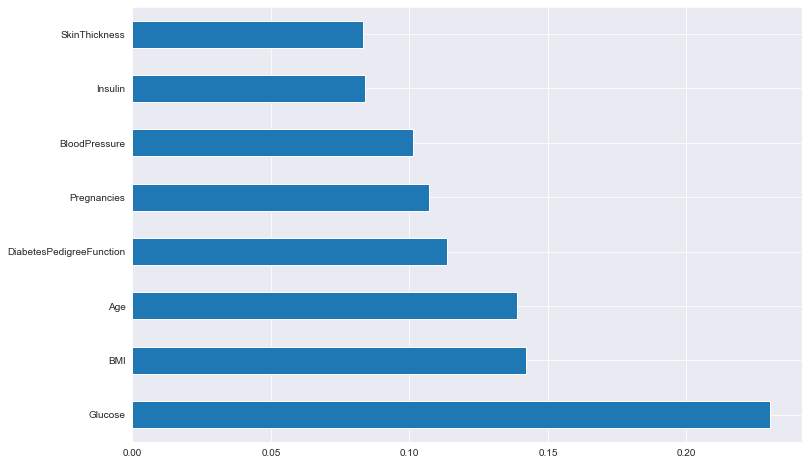

In [67]:
# CHECKING OUT THE MOST IMPORTANT FEATURES
plt.figure(figsize = (12,8))
Ranked_Features.nlargest(15).plot(kind='barh')

### FEATURE SCALING

In [68]:
# TRAIN TEST SPLIT
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.35,random_state=42)

In [69]:
# USED STANDARDIZATION,AS IT FOLLOWS GAUSSIAN DISTRIBUTION
Standard_Scaler=StandardScaler()

In [70]:
X_Train_Stand=pd.DataFrame(Standard_Scaler.fit_transform(X_Train),columns=X_Train.columns)
X_Train_Stand

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.682946,-0.511139,1.311559,-0.639799,-0.520209,0.665393,0.961868,-0.183708
1,0.069463,-1.066069,-0.278808,-0.639799,-0.520209,-0.631427,0.548248,-0.183708
2,-0.544021,-1.229283,-0.624368,-0.639799,-0.520209,1.078017,1.679515,-0.530944
3,0.989687,1.218937,-1.550246,0.619475,1.567409,-0.263012,0.470473,0.510764
4,0.682946,1.284223,-0.876880,-0.639799,-0.520209,-1.176680,-0.978963,1.465663
...,...,...,...,...,...,...,...,...
494,0.376204,0.533436,-0.708539,0.949026,0.799907,-0.543007,-0.155259,-0.617753
495,-0.850762,-0.870211,3.045695,-0.639799,-0.520209,-1.456675,-0.876442,-0.530944
496,1.909912,-0.706996,1.143217,1.168727,-0.520209,1.962212,2.407769,0.423955
497,-1.157504,0.598721,-0.278808,-0.639799,-0.520209,1.490641,-0.883512,-0.357326


In [71]:
X_Test_Stand=pd.DataFrame(Standard_Scaler.fit_transform(X_Test),columns=X_Test.columns)
X_Test_Stand

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.569010,-0.730866,-1.169519,0.693004,1.750376,0.201508,-0.125300,0.817036
1,-0.556458,-0.262994,0.255187,0.583210,-0.508010,0.457132,-1.097981,-1.046605
2,-0.556458,-0.396672,-0.666682,-0.675419,-0.508010,-0.279665,-1.063489,-1.046605
3,1.131743,-0.430091,0.674218,-0.675419,-0.508010,-1.211938,1.344068,0.054637
4,0.850377,0.539072,1.512280,-0.675419,-0.508010,-0.414995,-0.884129,1.410012
...,...,...,...,...,...,...,...,...
264,2.257211,-0.463511,0.674218,-0.675419,-0.508010,-1.362305,-1.135922,0.901747
265,-0.556458,-0.664027,-0.666682,-0.404937,-0.508010,-0.445068,-0.339152,-1.046605
266,1.413110,0.138039,-0.163844,0.693004,1.923049,0.412022,-0.635785,0.054637
267,-1.119192,-0.831124,-0.666682,1.351769,0.008435,1.795395,-0.346051,-0.961894


### MODEL SELECTION

In [72]:
Models=[]
Accuracy_Scores=[]

#### RANDOM FOREST CLASSIFIER

In [73]:
RFC = RandomForestClassifier()

RFC.fit(X_Train,y_Train)

RandomForestClassifier()

In [74]:
y_Pred=RFC.predict(X_Test)

print(metrics.accuracy_score(y_Test, y_Pred))
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))

0.7360594795539034
[[144  37]
 [ 34  54]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       181
           1       0.59      0.61      0.60        88

    accuracy                           0.74       269
   macro avg       0.70      0.70      0.70       269
weighted avg       0.74      0.74      0.74       269



In [75]:
Models.append('Random Forest Classifier')
Accuracy_Scores.append(100*(metrics.accuracy_score(y_Test, y_Pred)))

#### KNN

In [76]:
KNN=KNeighborsClassifier()

KNN.fit(X_Train,y_Train)

KNeighborsClassifier()

In [77]:
y_Pred1=KNN.predict(X_Test)

print(metrics.accuracy_score(y_Test, y_Pred1))
print(confusion_matrix(y_Test,y_Pred1))
print(classification_report(y_Test,y_Pred1))

0.6914498141263941
[[137  44]
 [ 39  49]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       181
           1       0.53      0.56      0.54        88

    accuracy                           0.69       269
   macro avg       0.65      0.66      0.65       269
weighted avg       0.70      0.69      0.69       269



In [78]:
Models.append('KNN')
Accuracy_Scores.append(100*(metrics.accuracy_score(y_Test, y_Pred1)))

#### DECISION TREE

In [79]:
DTREE=DecisionTreeClassifier()

DTREE.fit(X_Train,y_Train)

DecisionTreeClassifier()

In [80]:
y_Pred2=DTREE.predict(X_Test)

print(metrics.accuracy_score(y_Test, y_Pred2))
print(confusion_matrix(y_Test,y_Pred2))
print(classification_report(y_Test,y_Pred2))

0.6728624535315985
[[124  57]
 [ 31  57]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       181
           1       0.50      0.65      0.56        88

    accuracy                           0.67       269
   macro avg       0.65      0.67      0.65       269
weighted avg       0.70      0.67      0.68       269



In [81]:
Models.append('Decision Tree')
Accuracy_Scores.append(100*(metrics.accuracy_score(y_Test, y_Pred2)))

#### LOGISTIC REGRESSION

In [82]:
Log=LogisticRegression()

Log.fit(X_Train_Stand,y_Train)

LogisticRegression()

In [83]:
y_Pred3=Log.predict(X_Test_Stand)

print(metrics.accuracy_score(y_Test, y_Pred3))
print(confusion_matrix(y_Test,y_Pred3))
print(classification_report(y_Test,y_Pred3))

0.7509293680297398
[[150  31]
 [ 36  52]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       181
           1       0.63      0.59      0.61        88

    accuracy                           0.75       269
   macro avg       0.72      0.71      0.71       269
weighted avg       0.75      0.75      0.75       269



In [84]:
Models.append('Logistic Regression')
Accuracy_Scores.append(100*(metrics.accuracy_score(y_Test, y_Pred3)))

#### NAIVE BAYES

In [85]:
NB=GaussianNB()

NB.fit(X_Train,y_Train)

GaussianNB()

In [86]:
y_Pred4=NB.predict(X_Test)

print(metrics.accuracy_score(y_Test, y_Pred4))
print(confusion_matrix(y_Test,y_Pred4))
print(classification_report(y_Test,y_Pred4))

0.7360594795539034
[[140  41]
 [ 30  58]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       181
           1       0.59      0.66      0.62        88

    accuracy                           0.74       269
   macro avg       0.70      0.72      0.71       269
weighted avg       0.75      0.74      0.74       269



In [87]:
Models.append('Naive Bayes')
Accuracy_Scores.append(100*(metrics.accuracy_score(y_Test, y_Pred4)))

#### MODEL SCORES VISUALIZATION

In [88]:
Visualize_Scores=pd.DataFrame(list(zip(Models,Accuracy_Scores)),columns=['Models','Accuracy'])
Visualize_Scores

,Models,Accuracy
0,Random Forest Classifier,73.605948
1,KNN,69.144981
2,Decision Tree,67.286245
3,Logistic Regression,75.092937
4,Naive Bayes,73.605948


### HYPERPARAMETER TUNUNG

In [89]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1,2,3,4,5,7,9]
min_samples_leaf = [1,2,4,6,8]

Random_Grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(Random_Grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [90]:
RF_Classifier=RandomizedSearchCV(estimator=RFC,param_distributions=Random_Grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
RF_Classifier.fit(X_Train,y_Train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   r

In [91]:
RF_Classifier.best_params_

{'n_estimators': 800,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 340,
 'criterion': 'entropy'}

In [92]:
y_Pred=RF_Classifier.predict(X_Test)

print(accuracy_score(y_Test,y_Pred))
print(confusion_matrix(y_Test,y_Pred))
print(classification_report(y_Test,y_Pred))

0.7620817843866171
[[147  34]
 [ 30  58]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       181
           1       0.63      0.66      0.64        88

    accuracy                           0.76       269
   macro avg       0.73      0.74      0.73       269
weighted avg       0.77      0.76      0.76       269



In [93]:
File=open('Diabetes.pkl','wb')
pickle.dump(RF_Classifier,File)